In [1]:
import pandas as pd
import urllib
import urllib2
from bs4 import BeautifulSoup as bs
import re
import requests
import numpy as np
import pickle

import nltk

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%pylab inline

sns.set_style("darkgrid", {"text.color": ".1"})

/Users/ga/anaconda/envs/dsi/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
df_statml = pd.read_csv("StatMLPapers_tweets.csv")
df_statml['year'] = 2016
df_statml['genre'] = 'ML'
df_statml['source'] = 'Twitter'

In [3]:
df_16_NIPS = pd.read_csv('/Users/ga/Desktop/Capstone/open_review_abstracts_NIPS2016.csv')
df_16_NIPS['year'] = 2016
df_16_NIPS['genre'] = 'ML'
df_16_NIPS['source'] = 'NIPS'

In [4]:
df_17_ICLR = pd.read_csv('/Users/ga/Desktop/Capstone/open_review_abstracts_ICLR2017.csv')
df_17_ICLR['year'] = 2017
df_17_ICLR['genre'] = 'DL'
df_17_ICLR['source'] = 'ICLR'

In [5]:
df_16_NIPS_NAMPI = pd.read_csv('/Users/ga/Desktop/Capstone/open_review_abstracts_NIPS16_NAMPI.csv')
df_16_NIPS_NAMPI['year'] = 2016
df_16_NIPS_NAMPI['genre'] = 'ML'
df_16_NIPS_NAMPI['source'] = 'NIPS'

In [6]:
df_16_NIPS_MLITS = pd.read_csv('/Users/ga/Desktop/Capstone/open_review_abstracts_NIPS16_MLITS.csv')
df_16_NIPS_MLITS['year'] = 2016
df_16_NIPS_MLITS['genre'] = 'ML'
df_16_NIPS_MLITS['source'] = 'NIPS'

In [7]:
df_16_ICLR = pd.read_csv('/Users/ga/Desktop/Capstone/open_review_abstracts_ICLR16.csv')
df_16_ICLR['year'] = 2016
df_16_ICLR['genre'] = 'DL'
df_16_ICLR['source'] = 'ICLR'

In [8]:
df_CVPR_16 = pd.read_csv('/Users/ga/Desktop/Capstone/CVPR_2016/cvpr_2016.csv')
df_CVPR_16['year'] = 2016
df_CVPR_16['genre'] = 'CV'
df_CVPR_16['source'] = 'CVPR'

In [9]:
df_CVPR_15 = pd.read_csv('/Users/ga/Desktop/Capstone/CVPR_2016/cvpr_2015.csv')
df_CVPR_15['year'] = 2015
df_CVPR_15['genre'] = 'CV'
df_CVPR_15['source'] = 'CVPR'

In [10]:
df_CVPR_14 = pd.read_csv('/Users/ga/Desktop/Capstone/CVPR_2016/cvpr_2014.csv')
df_CVPR_14['year'] = 2014
df_CVPR_14['genre'] = 'CV'
df_CVPR_14['source'] = 'CVPR'

In [11]:
df_CVPR_13 = pd.read_csv('/Users/ga/Desktop/Capstone/CVPR_2016/cvpr_2013.csv')
df_CVPR_13['year'] = 2013
df_CVPR_13['genre'] = 'CV'
df_CVPR_13['source'] = 'CVPR'

In [12]:
df_NIPS = pd.read_csv('/Users/ga/Desktop/Capstone/NIPS/NIPS.csv')
df_NIPS['genre'] = 'ML'
df_NIPS['source'] = 'NIPS'

In [13]:
df_JMLR_16 = pd.read_csv('/Users/ga/Desktop/Capstone/JMLR/JMLR_16.csv')
df_JMLR_16['genre'] = 'ML'
df_JMLR_16['source'] = 'JMLR'

In [14]:
df_JMLR_15 = pd.read_csv('/Users/ga/Desktop/Capstone/JMLR/JMLR_15.csv')
df_JMLR_15['genre'] = 'ML'
df_JMLR_15['source'] = 'JMLR'

In [15]:
df_JMLR_14 = pd.read_csv('/Users/ga/Desktop/Capstone/JMLR/JMLR_14.csv')
df_JMLR_14['genre'] = 'ML'
df_JMLR_14['source'] = 'JMLR'

In [16]:
df_JMLR_13 = pd.read_csv('/Users/ga/Desktop/Capstone/JMLR/JMLR_13.csv')
df_JMLR_13['genre'] = 'ML'
df_JMLR_13['source'] = 'JMLR'

In [17]:
df_arxiv = pd.read_csv("/Users/ga/Desktop/Capstone/reddit/reddit_scraped_arxivs.csv")
df_arxiv['year'] = 2016
df_arxiv['genre'] = 'ML'
df_arxiv['source'] = 'arXiv'

In [18]:
df_open_rev = pd.read_csv("/Users/ga/Desktop/Capstone/reddit/reddit_scraped_openreview.csv")
df_open_rev['year'] = 2016
df_open_rev['genre'] = 'ML'
df_open_rev['source'] = 'OpenReview'

In [19]:
df_open_rev_s = df_open_rev[['title', 'abstract', 'genre', 'source', 'year']]
df_arxiv_s = df_arxiv[['title', 'abstract', 'genre', 'source', 'year']]
df_statml_s = df_statml[['text', 'abstract', 'genre', 'source', 'year']]

In [20]:
pd.options.mode.chained_assignment = None 

#find = re.compile(r"^(.*?)\..*")
new_text = []
find = re.compile(r"^([^.]*).*")
for l in df_statml_s['text']:
    m = re.match(find, l)
    new_text.append(m.group(1))

df_statml_s['title'] = new_text

In [21]:
df_statml_s.drop(["text"], axis=1, inplace=True)

In [22]:
frames = [df_statml_s, df_arxiv_s, df_open_rev_s, df_JMLR_13, df_JMLR_14, df_JMLR_15,
         df_JMLR_16, df_CVPR_13, df_CVPR_14, df_CVPR_15, df_CVPR_16, df_16_ICLR,
         df_16_NIPS_MLITS, df_16_NIPS_NAMPI, df_17_ICLR, df_16_NIPS]

In [23]:
result = pd.concat(frames, ignore_index=True)

In [24]:
result.shape

(7503, 5)

In [25]:
len(result.abstract.unique())

6806

In [26]:
unik_titles = result.title.unique().tolist()
len(result.title.unique())

6759

In [27]:
result = result.drop_duplicates("abstract")
result = result.drop_duplicates("title")

In [28]:
result.shape

(6605, 5)

In [29]:
len(result.title.unique())

6605

In [30]:
result['abstract'] = result['abstract'].str.replace('Abstract:?' , '')

In [31]:
result['title'] = result['title'].str.replace('\[R\]', '')

In [32]:
result[result.year == 2016].shape

(3722, 5)

In [33]:
result[result.year == 2015].shape

(867, 5)

In [34]:
result[result.year == 2014].shape

(849, 5)

In [35]:
result[result.year == 2013].shape

(753, 5)

In [36]:
result[result.year == 2017].shape

(414, 5)

In [37]:
result.groupby(['genre']).count()

,abstract,source,title,year
genre,,,,
CV,2247,2247,2247,2247
DL,518,518,518,518
ML,3839,3840,3840,3840


In [38]:
result.groupby(['year'])['title'].count()/result.shape[0]

year
2013    0.114005
2014    0.128539
2015    0.131264
2016    0.563512
2017    0.062680
Name: title, dtype: float64

In [39]:
result.reset_index(drop=True, inplace=True)

In [40]:
result[result['source'] == 'NIPS'].index

Int64Index([6142, 6143, 6144, 6145, 6146, 6147, 6148, 6149, 6150, 6151, 6152,
            6153, 6154, 6569, 6570, 6571, 6572, 6573, 6574, 6575, 6576, 6577,
            6578, 6579, 6580, 6581, 6582, 6583, 6584, 6585, 6586, 6587, 6588,
            6589, 6590, 6591, 6592, 6593, 6594, 6595, 6596, 6597, 6598, 6599,
            6600, 6601, 6602, 6603, 6604],
           dtype='int64')

In [41]:
result.shape

(6605, 5)

In [42]:
p = pd.DataFrame(result.groupby(['year', 'genre'])["title"].count()).reset_index()

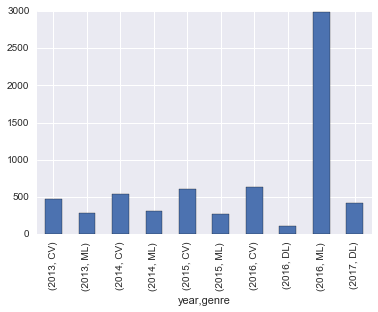

In [43]:
result.groupby(['year', 'genre']).count()["title"].plot(kind="bar")

In [44]:
result_abs = result['abstract'].tolist()

In [45]:
import enchant 
import inflect
p = inflect.engine()

In [46]:
p.singular_noun("analysis", count=1)

'analysi'

In [69]:
bad_words = ['tasks', 'methods', 'using', 'propose', 'based', 'problem',
            'results', 'method', 'different', 'demonstrate', 'paper',
            'approach', 'task', 'used', 'proposed', 'provide', 'study'
            'use', 'problems', 'work', 'present', "es", "al", "et", "em", "ed", "ca", 
            "ial", "rl", "i", "ii", "iii", "res", "ing", "ts", 'consider', 
            'include', 'issue', 'follow', 'remain', 'reation', 
            'achiev', 'techniqu', 'mage', 'cifar', 'learnng', 'ful', 
            'gorithms', 'ths', 'gorithm', 'featur', 'ful', 'subs', 'rs', 'ell']

bad_symb = ['\\',',','^',';',':','/','`','*','_','`','~','%','&','|','@',
               '{','}','[',']','(',')','>','<','"','#','+','.','!','=','?','$','\'']

def abstract_cleaner(abstract):
    is_english = enchant.Dict("en_US")
    abstract = "".join([i for i in abstract if not i.isdigit()])
    abstract = abstract.replace("\n", " ")
    abstract = abstract.replace("-", "")
    for char in bad_symb:
        if char in abstract:
            abstract = abstract.replace(char, "")
    for char in bad_words:
        if char.strip() in abstract.split(" "):
            abstract = abstract.replace(char, "")
    for word in abstract:
        if not is_english.check(word):
            abstract = abstract.replace(word, "")
#     for word in abstract.split(" "):                            # first word squash original
#         if word in first_word_squasher.keys():
#             abstract = abstract.replace(word, first_word_squasher[word])    # if mess up, delete,
#     for word in abstract.split(" "):                               # try again
#         if p.singular_noun(word, count=None) is not False:
#             abstract = abstract.replace(word, p.singular_noun(word, count=None))
    abstract = filter(None, abstract)
    return abstract 

In [50]:
result_abs = map(str, result_abs)
result_abs = map(abstract_cleaner, result_abs)

In [70]:
def first_word_squash(abstract):
    for word in abstract.split(" "):                            # first word squash original
        if word in first_word_squasher.keys():
            abstract = abstract.replace(word, first_word_squasher[word]) 
    return abstract

In [71]:
result_abs = map(first_word_squash, result_abs)

In [138]:
def second_word_squash(abstract):
    for word in abstract.split(" "):   
        word_strip = word.strip()
        # first word squash original
        if word_strip in second_word_squasher.keys():
            abstract = abstract.replace(word, second_word_squasher[word_strip]) 
    return abstract

In [139]:
result_abs = map(second_word_squash, result_abs)

In [114]:
dl_abs = result[result.genre=='DL']['abstract'].tolist()
dl_abs_join = " ".join(str(v) for v in dl_abs)
dl_abs_join = "".join([i for i in dl_abs_join if not i.isdigit()])
dl_abs_join = dl_abs_join.replace("\n", " ")
dl_abs_join = dl_abs_join.replace(".", "")
dl_abs_split = dl_abs_join.split(" ")
dl_abs_split = filter(None, dl_abs_split) # fastest

In [115]:
ml_abs = result[result.genre=='ML']['abstract'].tolist()
ml_abs_join = " ".join(str(v) for v in ml_abs)
ml_abs_join = "".join([i for i in ml_abs_join if not i.isdigit()])
ml_abs_join = ml_abs_join.replace("\n", " ")
ml_abs_join = ml_abs_join.replace(".", "")
ml_abs_split = ml_abs_join.split(" ")
ml_abs_split = filter(None, ml_abs_split) # fastest

In [116]:
cv_abs = result[result.genre=='CV']['abstract'].tolist()
cv_abs_join = " ".join(str(v) for v in cv_abs)
cv_abs_join = "".join([i for i in cv_abs_join if not i.isdigit()])
cv_abs_join = cv_abs_join.replace("\n", " ")
cv_abs_join = cv_abs_join.replace(".", "")
cv_abs_split = cv_abs_join.split(" ")
cv_abs_split = filter(None, cv_abs_split) # fastest

In [117]:
ml_abs_join = ml_abs_join.replace('infinitedimensional', 'infinite dimensional')

In [118]:
from nltk.corpus import stopwords
s=set(stopwords.words('english'))

new_s = s
for sw in list(s):
    new_s.add(sw.title())
    
nonstop_dl = filter(lambda w: not w in new_s, dl_abs_split)
nonstop_ml = filter(lambda w: not w in new_s, ml_abs_split)
nonstop_cv = filter(lambda w: not w in new_s, cv_abs_split)

In [119]:
# from collections import Counter
# counts = Counter(nonstop_dl)
# print counts

In [120]:
# from itertools import dropwhile

# for key, count in dropwhile(lambda key_count: key_count[1] >= 2, counts.most_common()):
#     del counts[key]

In [121]:
#print counts

In [122]:
# labels, values = zip(*counts.items())
# values = sorted(values)

# indexes = np.arange(len(labels))
# width = 1

# plt.bar(indexes, values, width)
# #plt.xticks(indexes + width * 0.1, labels)
# plt.show()

In [123]:
dl = ' '.join(nonstop_dl)

In [124]:
ml = ' '.join(nonstop_ml)

In [125]:
cv = ' '.join(nonstop_cv)

In [140]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=0.005, max_df=0.97, ngram_range=(1,3))
cvec.fit(result_abs)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.97, max_features=None, min_df=0.005,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [141]:
df_countvect  = pd.DataFrame(cvec.transform(result_abs).todense(),
             columns=cvec.get_feature_names())

#df = df.transpose().sort_values(0, ascending=False).transpose()



In [142]:
result.source.unique()

array(['Twitter', 'arXiv', 'OpenReview', 'JMLR', 'CVPR', 'ICLR', 'NIPS'], dtype=object)

In [143]:
df_count_NIPS = df_countvect.iloc[result[result.source=='NIPS'].index,:]
df_count_Twitter = df_countvect.iloc[result[result.source=='Twitter'].index,:]
df_count_arXiv = df_countvect.iloc[result[result.source=='arXiv'].index,:]
df_count_OpenReview = df_countvect.iloc[result[result.source=='OpenReview'].index,:]
df_count_CVPR = df_countvect.iloc[result[result.source=='CVPR'].index,:]
df_count_ICLR = df_countvect.iloc[result[result.source=='ICLR'].index,:]
df_count_JMLR = df_countvect.iloc[result[result.source=='JMLR'].index,:]

In [144]:
plurals = ['algorithms', 'models', 'features', 'datasets', 'errors', 'functions',
          'variables', ]

In [145]:
#df_count_Twitter.sum(axis=0).sort_values(ascending=False)

In [146]:
df_countvect.sum(axis=0).sort_values(ascending=False)

model                         7529
data                          5292
algorithm                     5150
learning                      4628
imag                          4253
network                       2791
feature                       2777
dataset                       2694
performance                   2426
new                           2272
object                        2241
function                      2122
set                           2106
use                           2085
training                      1836
structure                     1832
neural                        1730
large                         1719
number                        1650
deep                          1631
novel                         1613
stateoftheart                 1611
time                          1566
information                   1528
framework                     1443
optimization                  1443
distribution                  1439
classification                1436
sample              

In [147]:
#Twit_vocab = df_count_Twitter.sum(axis=0).sort_values(ascending=False).index.tolist()

In [148]:
all_word_counts = df_countvect.sum(axis=0).sort_values(ascending=False).index.tolist()

In [162]:
d1 = {}
for word1 in all_word_counts:
    for word2 in all_word_counts:
        if (word1 in word2 and len(word2.split(" ")) == 1 and word1 != word2 and
           word1 not in ["es", "al", "et", "em", "ed", "ca", 
                         "ial", "rl", "i", "ii", "iii",
                         "res", "ing", "lie", "ts"]):
            d1.setdefault(word1, []).append(word2)
            

In [163]:
cand_to_word3 = {}
for word in d1.keys():
    for candidate in d1[word]:
        if levenshteinDistance(word, candidate) == 1:
            cand_to_word3[candidate] = word

In [89]:
for key in ['score', 'user', 'arise', 'draw', 'gpu']:
    cand_to_word2.pop(key, None)

In [151]:
cand_to_word3

{u'arise': u'rise',
 u'based': u'base',
 u'cnns': u'cnn',
 u'compared': u'compare',
 u'dnns': u'dnn',
 u'draw': u'raw',
 u'experiments': u'experiment',
 u'gpu': u'gp',
 u'image': u'imag',
 u'machines': u'machine',
 u'models': u'model',
 u'nets': u'net',
 u'networks': u'network',
 u'results': u'result',
 u'rgbd': u'rgb',
 u'rnns': u'rnn',
 u'score': u'core',
 u'user': u'use'}

In [65]:
import pickle

In [91]:
#pickle.dump(cand_to_word, open("first_word_squasher.pkl", "wb"))
pickle.dump(cand_to_word2, open("second_word_squasher.pkl", "wb"))

In [92]:
#first_word_squasher = pickle.load(open("first_word_squasher.pkl", "rb"))
second_word_squasher = pickle.load(open("second_word_squasher.pkl", "rb"))

In [62]:
def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

In [155]:
levenshteinDistance("algorithm", "algorithmic")

2

In [317]:
for x,y in enumerate("HEYA"):
    print str(x), str(y)

0 H
1 E
2 Y
3 A


In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(stop_words='english', min_df=0.005, max_df=0.95, ngram_range=(1, 3))
tvec.fit(result_abs)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.95, max_features=None, min_df=0.005,
        ngram_range=(1, 3), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [167]:
df  = pd.DataFrame(tvec.transform(result_abs).todense(),
                   columns=tvec.get_feature_names(),
                   index=result_abs)

#df.transpose().sort_values('dl', ascending=False).head(10).transpose()

In [168]:
tvec.vocabulary_

{u'fit': 773,
 u'combinatorial': 300,
 u'algorithm outperform': 59,
 u'recent advance': 1638,
 u'experiment conducted': 690,
 u'chain': 245,
 u'exact': 671,
 u'norm': 1333,
 u'hash': 872,
 u'learn': 1082,
 u'influence': 982,
 u'forest': 786,
 u'coherence': 290,
 u'illustrate': 922,
 u'dependencies': 500,
 u'transition': 2073,
 u'pattern': 1440,
 u'metric': 1210,
 u'relevant': 1694,
 u'visual recognition': 2164,
 u'new model': 1319,
 u'physics': 1466,
 u'similar': 1846,
 u'correlated': 420,
 u'camera': 218,
 u'assigned': 123,
 u'automatically': 143,
 u'new framework': 1318,
 u'considering': 371,
 u'risk minimization': 1750,
 u'deep neural': 479,
 u'convolutional': 405,
 u'subsequently': 1959,
 u'like': 1102,
 u'direct': 555,
 u'parallel': 1419,
 u'variational': 2141,
 u'providing': 1576,
 u'direction': 557,
 u'employing': 627,
 u'attention': 134,
 u'heavily': 877,
 u'parameter': 1420,
 u'order magnitude': 1394,
 u'relationship': 1689,
 u'focusing': 781,
 u'video': 2154,
 u'stochastic gr

In [315]:
df.shape

(6605, 2917)

In [169]:
df.transpose().sort_values(result_abs[0], ascending=False).head(20).transpose()

,form,structural,intuitive,bias,initial,discover,tree,structure,knowledge,human,computational,right,discovered,understood,learn,consequence,model learn,grid,connectivity,qualitative
Both scientists and children make important structural discoveries yet their computational underpinnings are not well understood Structure discover has previously been formalized as probabilistic inference about the right structural form where form could be a tree ring chain grid etc Kemp Tenenbaum The discover of structural form PNAS While this can learn intuitive organizations including a tree for animals and a ring for the color circle it assume a strong inductive bias that considers only these particular form and each form is explicitly provided as initial knowledge Here we introduce a new computational model of how organizing structure can be discovered utilizing a broad hypothesis space with a preference for sparse connectivity Given that the inductive bias is more general the model initial knowledge shows little qualitative resemblance to some of the discoveries it support As a consequence the model can also learn complex structure for domain that lack intuitive description as well as predict human property induction judgments without explicit structural form By allowing form to emerge from sparsity our clarifies how both the richness and flexibility of human conceptual organization can coexist,0.486326,0.362734,0.211940,0.192301,0.190352,0.17779,0.173695,0.156285,0.140797,0.135959,0.129181,0.115584,0.114679,0.111813,0.111715,0.111068,0.109323,0.108993,0.108668,0.107421
We joint estimation of multiple graphical model arising from heterogeneous and highdimensional observation Unlike most previous approaches which assume that the cluster structure is given in advance an appealing feature of our is to learn cluster structure while estimating heterogeneous graphical model This is achieve via a high dimensional version of Expectation Conditional Maximization ECM algorithm Meng and Rubin A joint graphical lasso penalty is imposed in the conditional maximization step to extract both homogeneity and heterogeneity component across all cluster Our algorithm is computationally efficient due to fast sparse learning routines and can be implemented without unsupervised learning knowledge The superior performance of our is demonstrated by extensive experiment and its application to a Glioblastoma cancer dataset reveal some new insight in understanding the Glioblastoma cancer In theory a nonasymptotic error bound is established for the output directly from our high dimensional ECM algorithm and it consist of two quantities statistical error statistical accuracy and optimization error computational complexity Such a result gives a theoretical guideline in terminating our ECM iteration,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.108435,0.073267,0.000000,0.067222,0.000000,0.000000,0.000000,0.058134,0.000000,0.000000,0.000000,0.000000,0.000000
ReLU neural net define piecewise linear function of their input However initializing and training a neural net is very from fitting a linear spline In this we expand empirically upon previous theoretical to feature of trained neural net Standard net initialization and training produce net vastly simple than a naive parameter count would suggest and can impart odd feature to the trained net However we also show the forced simplicity is beneficial and indeed critical for the wide success of these net,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Neural network wth rectfed lnear unt actvatons are essentally multvarate lnear splnes As such one of many way to measure the complexty or expressvty of a neural network s to count the number of knots n the splne model We study the number of knots n fullyconnected feedforward neural network wth rectfed lnear unt actvaton functons We 